# QCTO - Workplace Module

### Project Title: Simulated Factor-Based ETF
#### Done By: Sanele Bhembe

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### **Introduction**
In this project I am attempting to simulate a factor-based Exchange-Traded Fund (ETF) using historical stock data listed in the Johannesburg Stock Exchange (JSE) market. An ETF is a type of investment fund that holds a collection of assets (such as stocks, bonds, or commodities) and trades on an exchange like a stock. It combines features of mutual funds and stocks, offering diversification and liquidity.

The main objective of this project is to create a stock selection strategy for a low risk, long-term investment ETF that minimizes risk while maintaining substantial growth overtime. The success of the risk reduction and growth performances of the ETF are measured by whether or not the ETF outperforms a benchmark stock index which is chosen to be the JSE Top 40 (J200) index.

#### **Assumptions made for this project:**
* Since this is a long term ETF, rebalancing should be infrequent. A minimum of 6 months rebalancing period is assumed to be enough for capturing long term trends for long term gains.
* Since rebalancing will occur at least after 6 months, transaction costs do not significantly erode returns. Therefore, they are not included (deducted) in the portfolio value.
* Spreads have not been taken into account when buying and selling stocks. Therefore, they are assumed to be zero.

#### **Metrics used to evaluate the performance of the ETF:**
* 

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

The following are the python packages required to complete this project successfully. These packages set up the python environment for different operations to be executed. The packages are:

* `pandas`: Used for data exploration and manipulation

* `numpy`: Used for arrays and mathematical operations

* `matplotlib.pyplot`: Used for setting up figures and making data visualizations

* `seaborn`: Used for advanced data visualizations

These packages are included in the requirements.txt file in the github repository to set up the python environment before attempting to reproduce or rerun this project.

---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

There are two main datasets used in this project, the historical data of multiple stocks listed in the JSE market and the JSE Top 40 index historical data. The individual stocks data was sourced from kaggle (link to dataset - https://www.kaggle.com/datasets/eren2222/south-africa-daily-historical-stock-1998-2024) and the JSE Top 40 dataset was collected from investing.com, a website with historical stock data for local and global markets. The multiple stocks dataset contains 9 columns namely:
* `'Date'`: This column contains the date for each recorded stock price (daily) (type object)

* `'Ticker'`: This column contains the stock symbols of the companies (categorical, type object)

* `'Company_Name'`: This column contains the name of the companies (catregorical, type object)

* `'Open'`: This column contains the open price of each day (type float)

* `'High'`: This column contains the high price of each day (type float)

* `'Low'`: This column contains the low price of each day (type float)

* `'Close'`: This column contains the close price of each day (type float)

* `'Adj Close'`: This column contains the adjusted close price of each day (type float)

* `'Volume'`: This column contains the total volume of shares traded in each day (type float)

The dataset containing the benchmark stock JSE Top 40 index has the following columns:
* `Date`: Contains the date for each recorded stock price (daily) (type object)

* `Price`: Contains the daily adjusted close price of the index (type object)

* `Open`: Contains the daily opening price of the index (type object)

* `High`: Contains the daily high price of the index (type object)

* `Low`: Contains the daily low price of the index (type object)

* `Vol.`: Contains the daily traded volume of the index (type object)

* `Change %`: Contains the percentage daily change in the price of the index (type object)


* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [8]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [10]:
#Loading the historical multiple stock data
df = pd.read_csv('Data/SA_Stock_Market.csv', index_col=0)

#Loading the benchmark data JSE Top 40 (J200)
j200 = pd.read_csv('Data/South Africa Top 40 Historical Data.csv')

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### **Cleaning the Multiple Stock Data**

Starting with the multiple stock data, this data is stored as `df`. It will be used to build algorithms and models for the simulated ETF. We start by checking the information about the columns contained, their data types and how many entries are in the dataset.

In [14]:
# Historical stock data (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891980 entries, 0 to 891979
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          891980 non-null  object 
 1   Ticker        891980 non-null  object 
 2   Company_Name  891980 non-null  object 
 3   Open          891961 non-null  float64
 4   High          891961 non-null  float64
 5   Low           891961 non-null  float64
 6   Close         891961 non-null  float64
 7   Adj Close     891961 non-null  float64
 8   Volume        891961 non-null  float64
dtypes: float64(6), object(3)
memory usage: 68.1+ MB


There are 891980 entries in the dataset. It seems most of the columns have the correct data type except `Date`. Let's correct this.

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

Now that the data types for the columns are correctly set, let's check for null values in the dataset.

In [18]:
# Checking null values
df.isnull().sum()

Date             0
Ticker           0
Company_Name     0
Open            19
High            19
Low             19
Close           19
Adj Close       19
Volume          19
dtype: int64

Upon first glance there seem to be 19 entries in 6 of the columns that contain null values, but these entries may also be in different rows and not all of them in the same 19 rows. Before deciding what to do let's check how many rows these null values affect.

In [20]:
print(f'Rows with null values: {len(df[df.isnull().any(axis=1)])}')

Rows with null values: 19


Great! There are only 19 rows with null values. This means we can amputate (remove) these rows without losing a significant amount of data in the grand scheme of things. Let's remove these rows.

In [22]:
df.dropna(inplace=True)

Now that we do not have null values anymore, let's move on to the benchmark dataset.

#### **Cleaning the Benchmark Data**

This dataset is  stored in the variable `j200`. Let's look at the state of the columns and the number of entries in it.

In [26]:
# J200 data
j200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4998 non-null   object
 1   Price     4998 non-null   object
 2   Open      4998 non-null   object
 3   High      4998 non-null   object
 4   Low       4998 non-null   object
 5   Vol.      4929 non-null   object
 6   Change %  4998 non-null   object
dtypes: object(7)
memory usage: 273.5+ KB


It seems the data types are incorrectly labeled. The dataset has 4998 entries. Let's look closer at what the data looks like.

In [28]:
j200.head()

Date      Price       Open       High        Low     Vol. Change %
0  05/22/2024  73,060.63  73,438.76  73,700.63  73,018.37  107.32M   -0.51%
1  05/21/2024  73,438.76  73,733.80  73,733.80  72,997.33   99.57M   -0.40%
2  05/20/2024  73,733.80  73,213.76  73,915.71  73,209.09  110.06M    0.71%
3  05/17/2024  73,213.76  73,214.00  73,432.59  72,677.43  103.75M    0.00%
4  05/16/2024  73,214.00  73,142.16  73,529.96  73,019.98  142.56M    0.10%

The price columns (`Price`, `Open`, `High`, `Low`) contain a comma which in `pandas` does not recognize as a value separator when attempting to convert to a float value, so these need to be removed. The `Vol.` column contains letters representing a multiplier and these need to be replaced by the numeric multiplier (e.g. `'M'` means $10^6$). Lastly, `Change %` contains the percentage symbol (%) which should also be removed. Let's first find the letters contained in the `Vol.` column.

In [30]:
letters = j200['Vol.'].str.extract(r'([a-zA-Z]+)')[0].unique()
letters

array(['M', nan, 'K'], dtype=object)

We only have `'M'`($10^6$) and `'K'` ($10^3$) as multipliers with `nan` for null cells. Let's find out how many null entries are there.

In [32]:
j200.isnull().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        69
Change %     0
dtype: int64

There are 69 null entries in the `Vol.` column. These null values can be removed since they would only account for about 1.4% of the entries in the dataset, making them not a significant loss to the data. We apply all the cvhanges that need to be applied in one go (data types, null values, comms and letters).

In [34]:
j200.dropna(inplace=True)
j200['Date'] = pd.to_datetime(j200['Date'])
j200['Price'] = j200['Price'].str.replace(',', '')
j200['Open'] = j200['Open'].str.replace(',', '')
j200['High'] = j200['High'].str.replace(',', '')
j200['Low'] = j200['Low'].str.replace(',', '')
j200['Vol.'] = j200['Vol.'].str.replace('M', '')
j200.loc[j200["Vol."].str.contains("K", na=False), "Vol_K"] = j200["Vol."]
j200['Vol.'] = j200['Vol.'].str.replace('K', '')
j200['Vol_K'] = j200['Vol_K'].str.replace('K', '')
j200['Change %'] = j200['Change %'].str.replace('%', '')


j200['Price'] = j200['Price'].astype('float32')
j200['Open'] = j200['Open'].astype('float32')
j200['High'] = j200['High'].astype('float32')
j200['Low'] = j200['Low'].astype('float32')
j200['Vol.'] = j200['Vol.'].astype('float32')
j200['Change %'] = j200['Change %'].astype('float32')
j200['Vol_K'] = j200['Vol_K'].astype('float32')
j200['Vol.'] = j200['Vol.'] * 1000000
j200['Vol_K'] = j200['Vol_K'] * 1000
j200.loc[~j200['Vol_K'].isna(), 'Vol.'] = j200['Vol_K']
j200.drop(columns={'Vol_K'}, axis=1, inplace=True)

j200.sort_values(by='Date', inplace=True)

In [35]:
j200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4929 entries, 4997 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4929 non-null   datetime64[ns]
 1   Price     4929 non-null   float32       
 2   Open      4929 non-null   float32       
 3   High      4929 non-null   float32       
 4   Low       4929 non-null   float32       
 5   Vol.      4929 non-null   float64       
 6   Change %  4929 non-null   float32       
dtypes: datetime64[ns](1), float32(5), float64(1)
memory usage: 211.8 KB


In [36]:
j200.head()

Date        Price         Open         High          Low  \
4997 2004-05-31  9525.950195  9412.849609  9526.459961  9394.769531   
4996 2004-06-01  9412.269531  9525.950195  9525.950195  9410.570312   
4995 2004-06-02  9424.580078  9412.269531  9514.309570  9353.349609   
4994 2004-06-03  9333.360352  9424.580078  9453.299805  9324.040039   
4993 2004-06-04  9302.429688  9333.360352  9388.589844  9302.429688   

              Vol.  Change %  
4997  2.597000e+07      1.20  
4996  5.916000e+07     -1.19  
4995  8.686000e+07      0.13  
4994  7.577000e+07     -0.97  
4993  7.422000e+07     -0.33

Our benchmark dataset looks good to go.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

In this section we are exploring the nature of the datasets to understand the relationships of the prices and volumes overtime. This can also help in understanding if there are any outliers hidden in the data.

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


#### **EDA for the Multiple Stock Dataset**

We start with `df` which contains the multiple stocks. Let's figure out how many different stocks are in this dataset.

In [41]:
# How many unique stocks we have in the df data
print(f'Stocks in the data: {len(df['Ticker'].unique())}')

Stocks in the data: 193


In [42]:
# Date range
print(f'Earliest Date: {df['Date'].min()}')
print(f'Latest Date: {df['Date'].max()}')

Earliest Date: 1998-12-30 00:00:00
Latest Date: 2024-05-22 00:00:00


There are 193 unique stocks in the dataset that were listed in the JSE over a time period for `1998-12-30 00:00:00` to `2024-05-22 00:00:00`. The next thing to do is to figure out how the number of stocks change over this period.

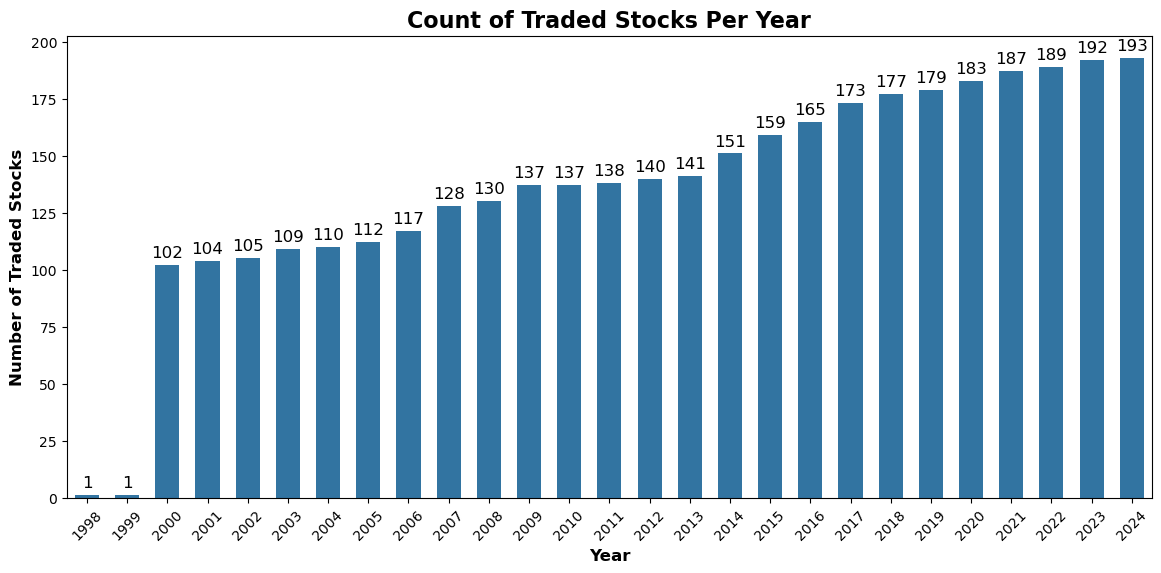

In [44]:
# Count of stock per year over the years
stocks_per_year = df[['Date', 'Ticker']].copy()
stocks_per_year['Date'] = stocks_per_year['Date'].dt.year
stocks_per_year = stocks_per_year.groupby('Date')['Ticker'].nunique().reset_index(name='Ticker_Count')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=stocks_per_year['Date'], y=stocks_per_year['Ticker_Count'], width=0.6)

# Add text annotations on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,   # X position
            p.get_height() + 2,               # Y position (slightly above the bar)
            int(p.get_height()),              # The actual value
            ha='center', va='bottom', fontsize=12)

# Customize plot
plt.title('Count of Traded Stocks Per Year', fontweight='bold', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Number of Traded Stocks', fontweight='bold', fontsize=12)

# Show the plot
plt.show()

The barplot shows the stock data available in the dataset each year. In the first 2, 1998 and 1999, there is only data for one stock. From the year 2000 onwards there is at least 102 stocks available for analysis. This suggests that our analysis should only consider data from the year 2000 onwards. It is worth noting that the number of stocks in the dataset either remain the same or increase year-on-year. This hopefully means that once a stock is added in the dataset at a point in time it remains for the rest of the years in the dataset. This is important for the performance of the ETF to be simulated because it means that the value of each selected stock to make up the portfolio of the ETF does not go to zero or the stock gets delisted. Let's confirm that none of the stocks completely lose all of their value or get delisted in the market.

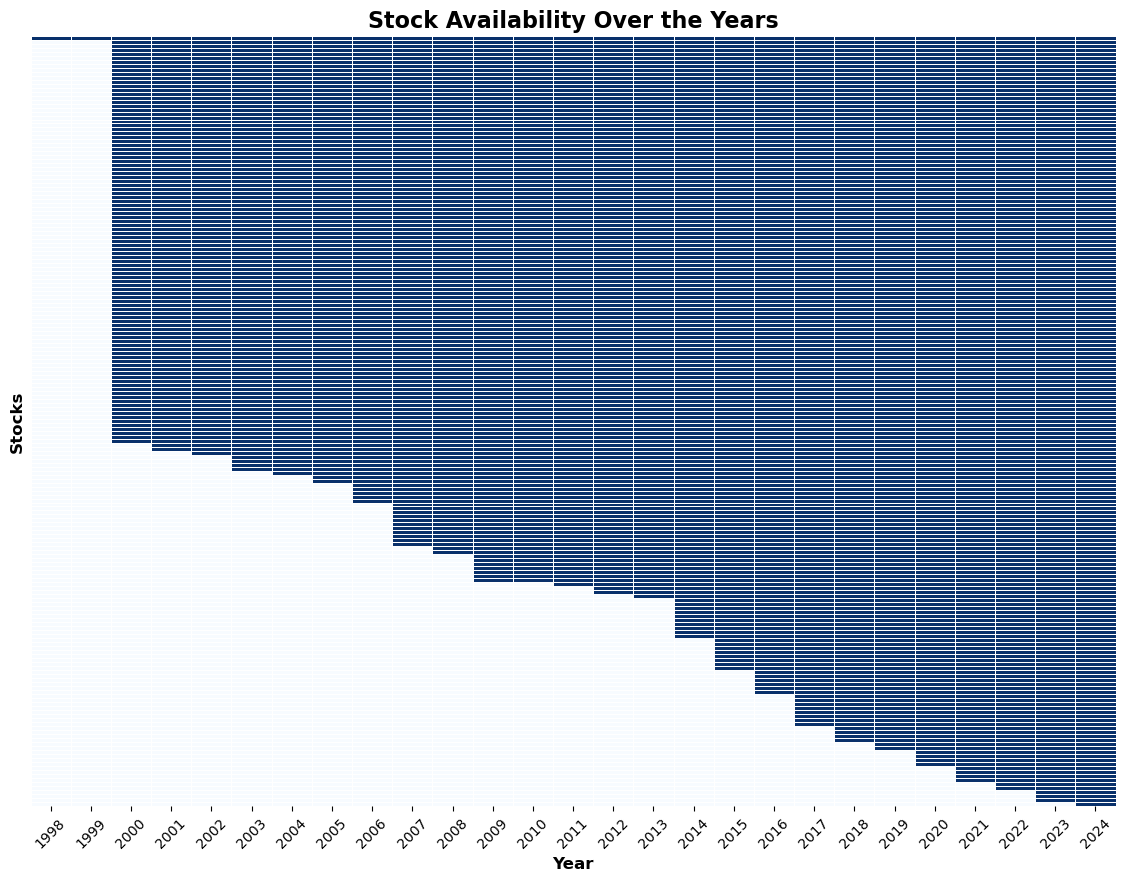

In [46]:
df_copy = df.copy()
df_copy['Year'] = df_copy['Date'].dt.year

# Create a pivot table with tickers as rows and years as columns
stock_presence = df_copy.groupby(['Ticker', 'Year']).size().unstack(fill_value=0)

# Convert to binary (1 = stock available, 0 = missing)
stock_presence = stock_presence.map(lambda x: 1 if x > 0 else 0)

first_appearance = stock_presence.idxmax(axis=1)  # First non-zero value per stock

# Sort the stocks by their first appearance year
sorted_stocks = first_appearance.sort_values().index

# Reorder the rows in stock_presence based on sorted stock order
stock_presence = stock_presence.loc[sorted_stocks]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(stock_presence, cmap='Blues', linewidths=0.7, cbar=False)
# Customize labels
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Stocks', fontsize=12, fontweight='bold')
plt.yticks([])
plt.xticks(rotation=45)
plt.title('Stock Availability Over the Years', fontsize=16, fontweight='bold')

plt.show()

The figure above shows the inception of each stock and its presence in the subsequent years after its inception. A stock's presents in the market is represented by the dark blue shaded bars in each year of its presence. The empty (white) bars represent each stock's absence in the stock market (not yet listed in the market or absent in the dataset). The data starts off with just one stock for the first 2 years but gets more stocks added to it as the years go by. The absence of empty bars after each stock's inception mean that all the stocks remain listed in the stock market and their data is available in this dataset.

Moving on to understanding the trend of the prices of the stocks, the `Adj Close` is used to plot this trend since this is the price that will mainly be used for modelling the ETF. There are 193 stocks in the dataset and a facet grid is the best way to show the trend of each overtime while using as little space as possible but even this figure will take up a significant amount of space and time to scan through for analysis.

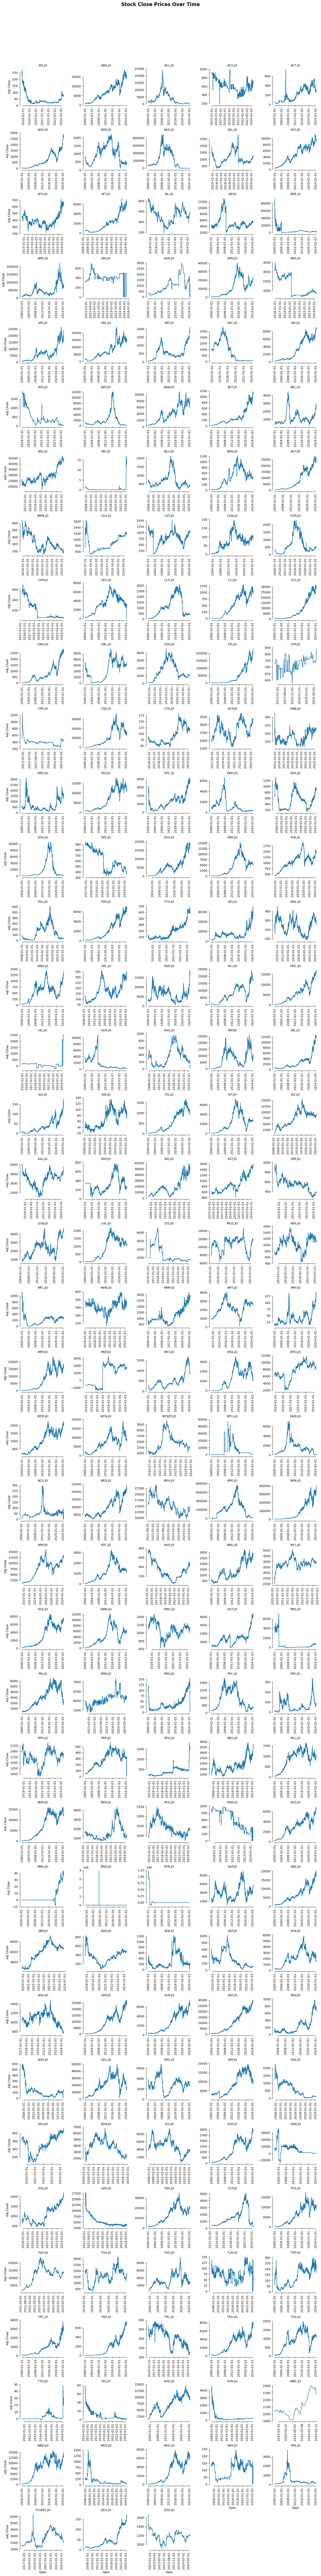

In [49]:
g = sns.FacetGrid(df, col='Ticker', col_wrap=5, height=3, sharex=False, sharey=False)

# Plot each stock's close price
g.map_dataframe(sns.lineplot, x='Date', y='Adj Close')
g.fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
g.despine(trim=True)

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

# Adjust titles and layout
g.set_titles('{col_name}')  # Stock ticker as title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stock Close Prices Over Time', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Most of the stocks show normal, sturdy movements overtime while other, like `ARA.JO` get massive one-day drops. Such stocks show the importance of ETFs. Investing in individual stocks have an increased risk of such events happening. Now moving on to the benchmark stock index data.

#### **EDA for the Benchmark Dataset**

In the `j200` dataset we can plot the trend of the `Price` column overtime to understand the movement of the price for this stock index.

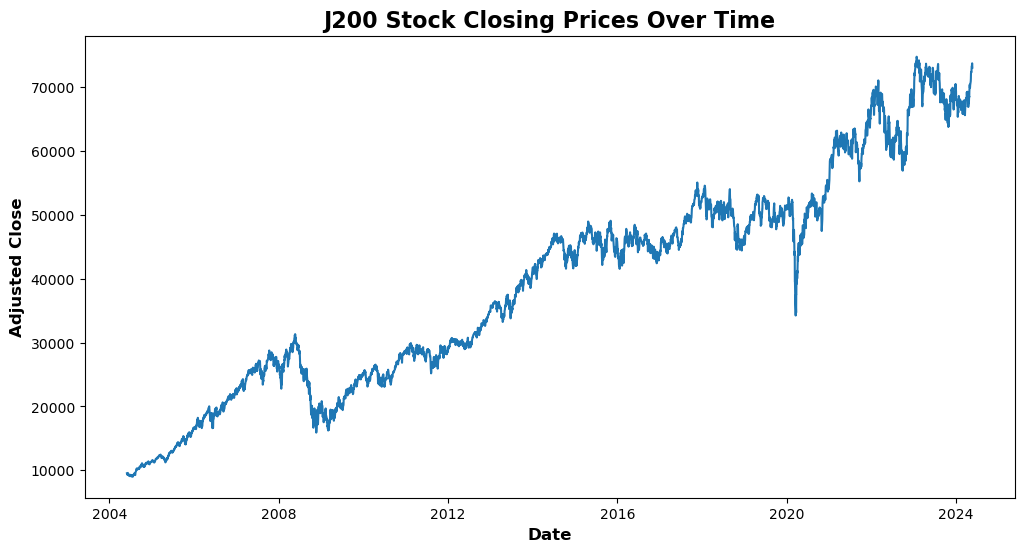

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=j200, x='Date', y='Price')
plt.title('J200 Stock Closing Prices Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Adjusted Close', fontweight='bold', fontsize=12)
plt.show()

The closing price of the `j200` benchmark shows a normal price trend with noticeable large dips in price around 2008-2009 and 2020-2021. Apart from that the price shows consistent growth overtime. The next thing to analyse is the the traded volume of this index overtime. This will show how popular the stock is in terms of market participation.

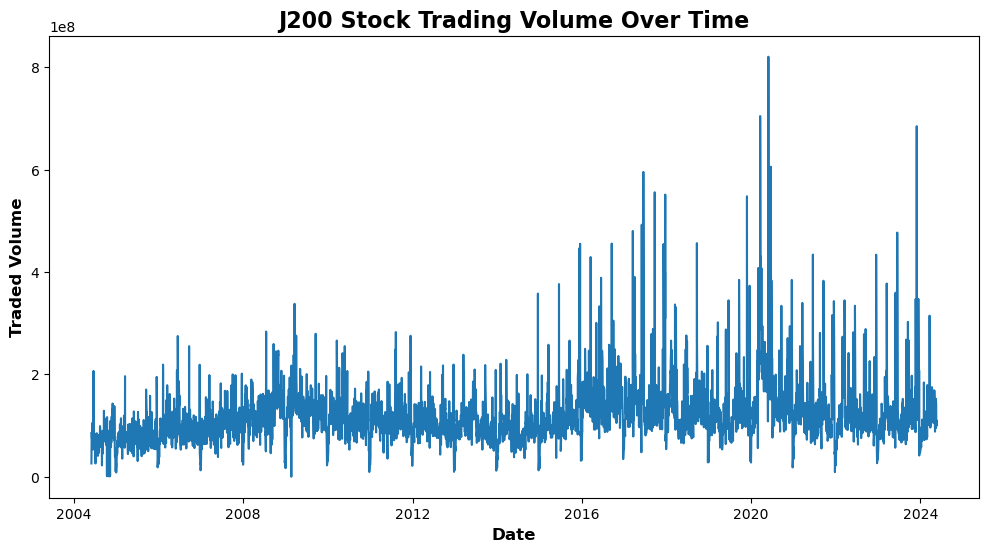

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=j200, x='Date', y='Vol.')
plt.title('J200 Stock Trading Volume Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontweight='bold',fontsize=12)
plt.ylabel('Traded Volume', fontweight='bold', fontsize=12)
plt.show()

In [56]:
print(f'Average Traded Volume: {j200['Vol.'].mean():.0f}')

Average Traded Volume: 119955206


The trend of the traded volume is slightly increasing on average over the time period while also increasing in the peaks of daily volume. The average at almost 120 million (119955206) indicates strong market participation over this period which reduces volatility, making the stock stable. The trend of the volume verses the adjusted close of the stock can reveal this stock's market sentiment. Let's plot this.

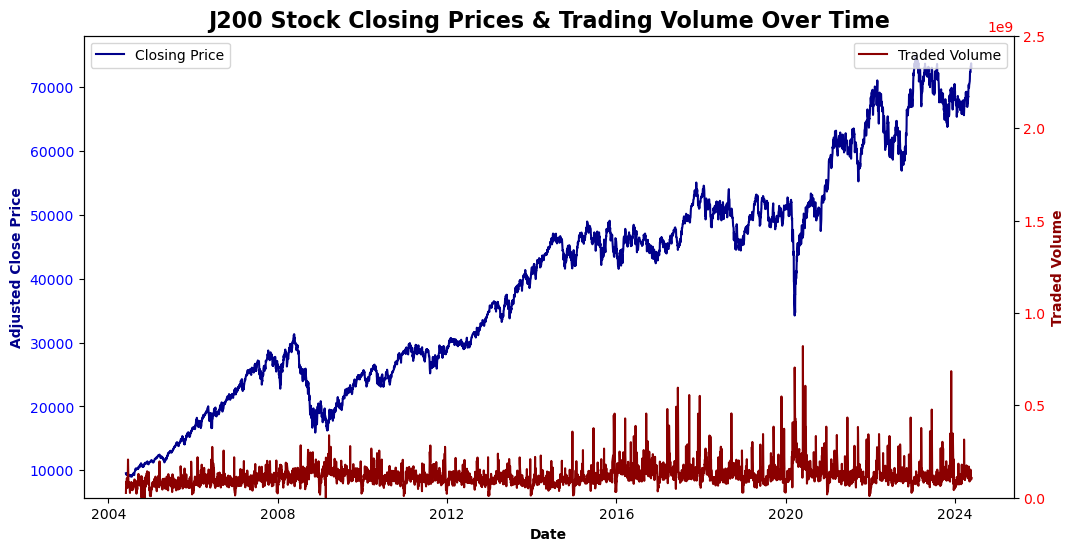

In [58]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price on Primary Y-axis
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Adjusted Close Price', fontweight='bold', color='darkblue')
sns.lineplot(data=j200, x='Date', y='Price', ax=ax1, color='darkblue', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create Secondary Y-axis for Traded Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Traded Volume', fontweight='bold', color='darkred')
sns.lineplot(data=j200, x='Date', y='Vol.', ax=ax2, color='darkred', label='Traded Volume')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 2500000000)

# Set Title
plt.title('J200 Stock Closing Prices & Trading Volume Over Time', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

---
The closing price of the `j200` benchmark (shown in blue line plot) shows a normal price trend with noticeable large dips around 2008-2009 and 2020-2021. Apart from that the price shows consistent growth overtime. The traded volume (shown in the red line plot) is slightly increasing on average over the time period while also increasing in the peaks of daily volume traded. The highest peak in daily traded volume occured around the same time the price of the stock took a large in dip around 2020-2021, indicating large sell off and low conviction in the stock. But the average volume at almost 120 million (119955206) over the entire 20 year period indicates strong market participation which reduces volatility, making the stock stable. We can plot the volume verse price to get a better view of how market participation changes with the price of the stock.

---

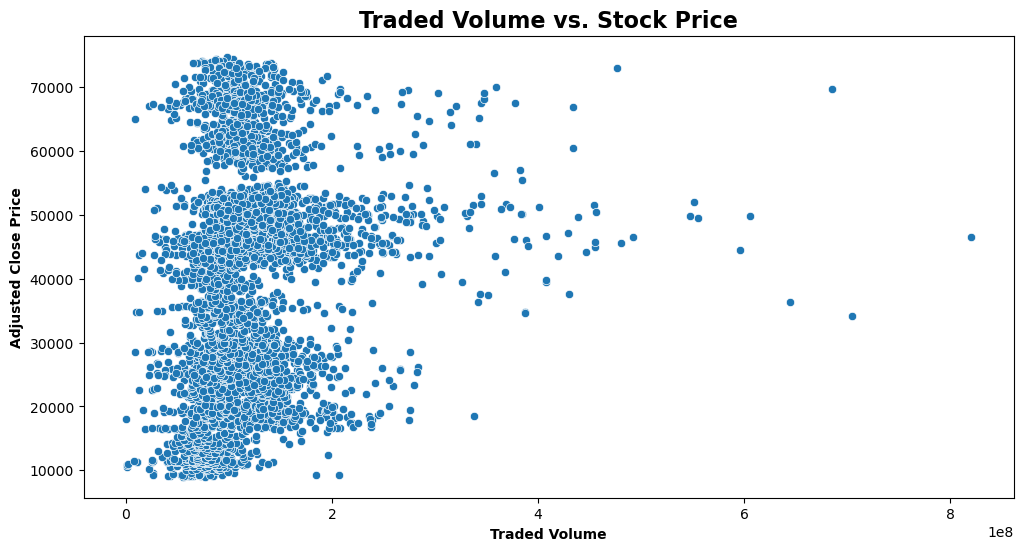

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=j200, x='Vol.', y='Price')
plt.title('Trading Volume vs. Stock Price')
plt.xlabel('Traded Volume', fontweight='bold')
plt.ylabel('Adjusted Close Price', fontweight='bold')
plt.title('Traded Volume vs. Stock Price', fontsize=16, fontweight='bold')
plt.show()

---
The scatterplot above shows the change in the stock price as the volume changes and vice versa. The traded volume increases with increasing price, with bigger traded days becoming more frequent at higher prices. This shows that the upward price movement of the stock is supported by strong interest in buyers and general participation.
Lastly, let's look at the start date and end date of our benchmark dataset. This date range will tell us how much data we need from the multiple stock dataset.

---

In [62]:
print(f'Start date in the benchmark dataset: {j200['Date'].min()}')
print(f'End date in the benchmark dataset: {j200['Date'].max()}')

Start date in the benchmark dataset: 2004-05-31 00:00:00
End date in the benchmark dataset: 2024-05-22 00:00:00


---
The `j200` dataset begins in 2004-05-31 and ends in 2024-05-22. For comparison in the evaluation, only data from 2005-01-01 to 2023-12-31 will be used.

The benchmark data seems ready for comparison. The next step is to build algorithms and models for the ETF to compare to this benchmark.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

The models and algorithms that are to be developed have an initial capital investment of R50000. This capital is initially spent buying shares of the top 40 performing stocks in the dataset. The capital is split equally among the initial top 40 stocks, spending R1250 in each stock. This portfolio is then tracked overtime and managed by rebalancing the stocks and their weights. Rebalancing occurs either bi-annually (every 6 months) or annually and stocks that are in the portfolio that underperform are replaced by stocks that perform well and are not in the portfolio. Stocks that underperform are sold at whatever value they have at that point in time and the proceeds (capital acquired from selling the underperforming stocks) are spilt equally to buy replacement stocks that perform well. The number of stocks in the portfolio remains the same (at 40 stocks throughout the whole time). The criteria for selecting stocks is the momentum of the stock (total percentage return over a given period). The period for selecting the stocks depends on the model or algorithm used but has a lookback period in the range of 6 to 24 months from the date of rebalancing. The portfolio has exactly 40 stocks because our benchmark dataset (`j200` dataset) tracks the top 40 stocks in the JSE market, so it is an attempt to compare apples to apples in terms of the number of constituents in both the ETF and the benchmark index.

Some important information is collected in each algorithm and model for use later in the evaluation section for performance assessment purposes. The information includes:
* The daily portfolio value

* The yearly portfolio value

* The stock constituents in the portfolio at every rebalance date

* The number of shares and percentage weight of each stock in the portfolio

Let's start by creating a function that plots the portfolio value of each algorithm or model to help understand the nature of the value overtime.



---


In [66]:
def plot_portfolio_value(df, model):
    df = df[df['Date'] <= '2024-01-01']
    df = df[~df['Date'].isin(['2007-06-25'])]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Portfolio_Value')
    plt.title(f'{model} Portfolio Value Overtime', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontweight='bold', fontsize=12)
    plt.ylabel('Portfolio Value', fontweight='bold', fontsize=12)
    plt.show()

---
#### **Annually Rebalanced ETF Algorithm**

Now that the function for plotting the portfolio value overtime is done, let's start with the first algorithm. This algorithm rebalances annually and uses a lookback period of 12 months to select the top 40 performing stocks. The stocks arebought on the first trading day of 2005 for the first time with the initial R50000 capital. This portfolio is then rebalanced on the first trading of each year thereafter. The code for this is below.

---

In [69]:
# ETF that rebalances annually
def annual_rebalance_algo(df):
    df['Year'] = df['Date'].dt.year
    # Calculate Annual Returns (for each stock, each year)
    annual_returns = df.groupby(['Ticker', 'Year'])['Close'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    ).reset_index(name='Return').sort_values(['Year', 'Return'], ascending=[True, False])
    
    # Initialize ETF
    initial_capital = 50_000
    portfolio = {}  
    portfolio_history = {}  
    portfolio_daily_value = pd.DataFrame(columns=['Date', 'Portfolio_Value'])  
    
    # Get all unique dates in the dataset
    unique_dates = df['Date'].sort_values().unique()
    
    # Find the first available year with data
    first_year = 2004 
    last_year = 2024  
    
    for date in unique_dates:
        current_year = date.year
        
        # Skip years before 2001 (if any exist in data)
        if current_year < 2005:
            continue
        
        # Rebalance on first trading day of each year
        if date == df[df['Year'] == current_year]['Date'].min():
            # Get top 40 stocks from previous year's performance
            if current_year == first_year:
                # For the first year, use current year's data (no prior year)
                top_stocks = annual_returns[annual_returns['Year'] == current_year].head(40)['Ticker'].tolist()
            else:
                # For subsequent years, use previous year's top performers
                top_stocks = annual_returns[annual_returns['Year'] == current_year - 1].head(40)['Ticker'].tolist()
            
            # Rebalance portfolio
            if portfolio:
                # Sell stocks not in the new top 40
                sold_value = 0
                stocks_to_remove = [s for s in portfolio if s not in top_stocks]
                
                for stock in stocks_to_remove:
                    # Use last available price before rebalance date
                    last_price = df[(df['Ticker'] == stock) & (df['Date'] < date)]['Close'].iloc[-1]
                    sold_value += portfolio[stock] * last_price
                    del portfolio[stock]
                
                # Buy new stocks (equal allocation of sale proceeds)
                new_stocks = [s for s in top_stocks if s not in portfolio]
                capital_per_stock = sold_value / len(new_stocks) if new_stocks else 0
                
                for stock in new_stocks:
                    # Use first available price on rebalance date
                    first_price = df[(df['Ticker'] == stock) & (df['Date'] == date)]['Close'].iloc[0]
                    shares = capital_per_stock / first_price
                    portfolio[stock] = shares
            else:
                # Initial investment (first year)
                capital_per_stock = initial_capital / 40
                for stock in top_stocks:
                    first_price = df[(df['Ticker'] == stock) & (df['Date'] == date)]['Close'].iloc[0]
                    shares = capital_per_stock / first_price
                    portfolio[stock] = shares
            
            # Record portfolio composition after rebalancing
            current_prices = df[df['Date'] == date].set_index('Ticker')['Close']
            current_value = sum(shares * current_prices.get(stock, 0) for stock, shares in portfolio.items())
            
            yearly_data = []
            for stock, shares in portfolio.items():
                price = current_prices.get(stock, 0)
                stock_value = shares * price
                yearly_data.append({
                    'Ticker': stock,
                    'Shares': round(shares, 2),
                    'Share Price': round(price, 2),
                    'Value Contribution': round(stock_value, 2),
                    '% of Portfolio': round((stock_value / current_value) * 100, 2) if current_value > 0 else 0
                })
            
            portfolio_history[current_year] = {
                'Portfolio_Value': round(current_value, 2),
                'Stocks': pd.DataFrame(yearly_data)
            }
        
        # Calculate daily portfolio value
        daily_prices = df[df['Date'] == date].set_index('Ticker')['Close']
        daily_value = sum(shares * daily_prices.get(stock, 0) for stock, shares in portfolio.items())
        
        # Append to daily values
        portfolio_daily_value = pd.concat([
            portfolio_daily_value,
            pd.DataFrame({'Date': [date], 'Portfolio_Value': [daily_value]})
        ], ignore_index=True)
    
        # Stop if we've reached 2024
        if current_year >= last_year:
            break
    
    # Sort daily values
    portfolio_daily_value = portfolio_daily_value.sort_values('Date').reset_index(drop=True)
    return portfolio_daily_value, portfolio_history


In [70]:
annual_daily_port_value, annual_port_history = annual_rebalance_algo(df)

C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\2838454798.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_daily_value = pd.concat([


---
Let's now plot the portfolio value overtime.

---

C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\4005892966.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df['Date'].isin(['2007-06-25'])]


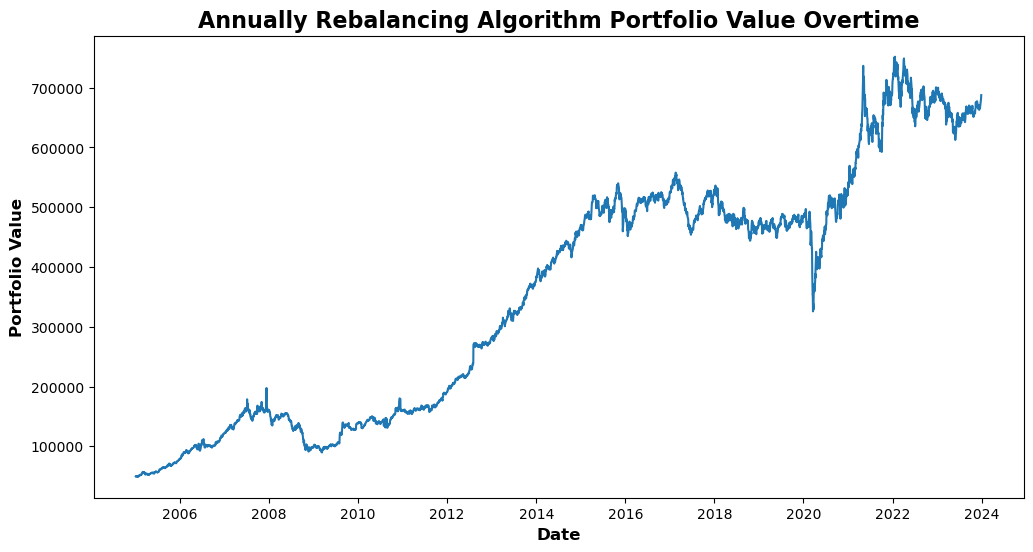

Portfolio Value at the beginning of 2024: R687306.02


In [72]:
plot_portfolio_value(annual_daily_port_value, 'Annually Rebalancing Algorithm')
print(f'Portfolio Value at the beginning of 2024: R{annual_port_history[2024]['Portfolio_Value']}')

The portfolio value grows quite naturally overtime with normal drops for the most part. There is a note worthy drop in value between 2020 and 2021 which coincides with the COVID-19 nationwide lockdown that affected the economy for that period. The price seems very stable and sturdily growing before 2020 but begins to be very volatile after 2020. The value of the portfolio at the beginning of 2024 is R687,306.02 which is roughly 1,274.6% increase in value in 19 years. Let's move on to the next model.

---

#### **Annually Rebalanced ETF With Etreme Gradient Boosting (XGBoost) Regressor Model**

This model is similar to the alogrithm covered above with the difference being that it uses a XGBoost regressor model to predict the top performing stocks when rebalancing. The model trains on data from the previous 12 to 24 months, predicting which stocks will perform the best in terms of momentum (total return) for the next 12 months. The lookback period is 12 months if stock data beyond 24 months is not available and 24 months for stocks with more than 24 months of data. Since the model is going to be trained every time when the portfolio needs to be rebalanced, the XGBoost model is suitable because it generally trains fast and in the event that the data fed to the model has missing values (maybe certain stocks have missing data for certain days) this model can deal with such missing data. In addition, XGBoost does a decent job at dealing with non-linear data which is the nature of the stock data. The code for this model is below.

---

In [76]:
# Model that rebalances annually with predicted stocks using an XGBoost model
def annual_rebalance_xgb(df):
    xgb_model = XGBRegressor(
        n_estimators=150,
        learning_rate=0.08,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'
    )
    scaler = StandardScaler()
    
    annual_returns = df.groupby(['Ticker', 'Year'])['Close'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    ).reset_index(name='Return').sort_values(['Year', 'Return'], ascending=[True, False])
    
    initial_capital = 50_000
    portfolio = {}
    portfolio_history = {}
    portfolio_daily_values = []
    
    unique_dates = df['Date'].sort_values().unique()
    first_year = 2004
    last_year = 2024
    
    price_lookup = df.set_index(['Date', 'Ticker'])['Close'].to_dict()

    rebalance_performance = {}
    
    for date in unique_dates:
        current_year = date.year
        
        if current_year < 2005:
            continue
        
        if date == df[df['Year'] == current_year]['Date'].min():
            print(f'Rebalancing for year: {current_year}')
            
            top_stocks = []
            try:
                lookback_start = date - pd.DateOffset(years=3)
                X_train, y_train, valid_tickers = [], [], []
                
                for ticker, group in df[(df['Date'] >= lookback_start) & (df['Date'] < date)].groupby('Ticker'):
                    closes = group['Close'].values
                    
                    if len(closes) < 252:
                        continue
                    
                    features = [
                        (closes[-1] - closes[-252]) / closes[-252],
                        (closes[-1] - closes[-504]) / closes[-504] if len(closes) >= 504 else 0,
                        np.std(closes[-252:]) / np.mean(closes[-252:]),
                        np.mean(group['Volume'].iloc[-252:]) if 'Volume' in group else 0,
                        (closes[-1] - np.min(closes[-252:])) / np.min(closes[-252:]),
                        len([x for x in (closes[-252:] > closes[-252])]) / 252
                    ]
                    
                    future_data = df[(df['Ticker'] == ticker) & (df['Date'] > date - pd.DateOffset(years=1)) & (df['Date'] <= date)]
                    if len(future_data) > 0:
                        future_return = (future_data['Close'].iloc[-1] - closes[-1]) / closes[-1]
                        X_train.append(features)
                        y_train.append(future_return)
                        valid_tickers.append(ticker)
        
                
                if len(X_train) > 100:
                    X_train = scaler.fit_transform(X_train)
                    xgb_model.fit(X_train, y_train)

                    
                    X_pred = X_train
                    current_data = df[df['Date'] == date]
                    

                    if len(X_pred) > 0:
                        
                        pred_returns = xgb_model.predict(X_pred)
                        top_stocks = [valid_tickers[i] for i in np.argsort(pred_returns)[-40:]]
            except Exception as e:
                print(f"XGBoost failed on {date.date()}: {str(e)}")
            
            if len(top_stocks) == 0:
                print('Using fallback momentum strategy')
                top_stocks = annual_returns[annual_returns['Year'] == current_year - 1].head(40)['Ticker'].tolist()
            
            current_prices = {ticker: price for (d, ticker), price in price_lookup.items() if d == date}
            
            sold_value = sum(portfolio.get(stock, 0) * current_prices.get(stock, 0) for stock in portfolio if stock not in top_stocks)
            portfolio = {stock: shares for stock, shares in portfolio.items() if stock in top_stocks}
            
            new_stocks = [s for s in top_stocks if s not in portfolio]
            capital_per_stock = (sold_value + (initial_capital if not portfolio else 0)) / len(new_stocks) if new_stocks else 0
            
            for stock in new_stocks:
                if stock in current_prices and capital_per_stock > 0:
                    shares = capital_per_stock / current_prices[stock]
                    portfolio[stock] = shares
            
            current_value = sum(shares * current_prices.get(stock, 0) for stock, shares in portfolio.items())
            
            yearly_data = []
            for stock, shares in portfolio.items():
                price = current_prices.get(stock, 0)
                stock_value = shares * price
                yearly_data.append({
                    'Ticker': stock,
                    'Shares': round(shares, 6),
                    'Share Price': round(price, 2),
                    'Value Contribution': round(stock_value, 2),
                    '% of Portfolio': round((stock_value / current_value) * 100, 2)
                })
            
            portfolio_history[current_year] = {
                'Portfolio_Value': round(current_value, 2),
                'Stocks': pd.DataFrame(yearly_data)
            }
        
        daily_value = sum(shares * price_lookup.get((date, stock), 0) for stock, shares in portfolio.items())
        portfolio_daily_values.append({'Date': date, 'Portfolio_Value': daily_value})
        
        if current_year >= last_year:
            break
    
    portfolio_daily_value = pd.DataFrame(portfolio_daily_values).sort_values('Date')
    return portfolio_daily_value, portfolio_history


In [77]:
annual_daily_port_value_xgb, annual_port_history_xgb = annual_rebalance_xgb(df)

Rebalancing for year: 2005
Rebalancing for year: 2006
Rebalancing for year: 2007
Rebalancing for year: 2008
Rebalancing for year: 2009
Rebalancing for year: 2010
Rebalancing for year: 2011
Rebalancing for year: 2012
Rebalancing for year: 2013
Rebalancing for year: 2014
Rebalancing for year: 2015
Rebalancing for year: 2016
Rebalancing for year: 2017
Rebalancing for year: 2018
Rebalancing for year: 2019
Rebalancing for year: 2020
Rebalancing for year: 2021
Rebalancing for year: 2022
Rebalancing for year: 2023
Rebalancing for year: 2024


C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\4005892966.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df['Date'].isin(['2007-06-25'])]


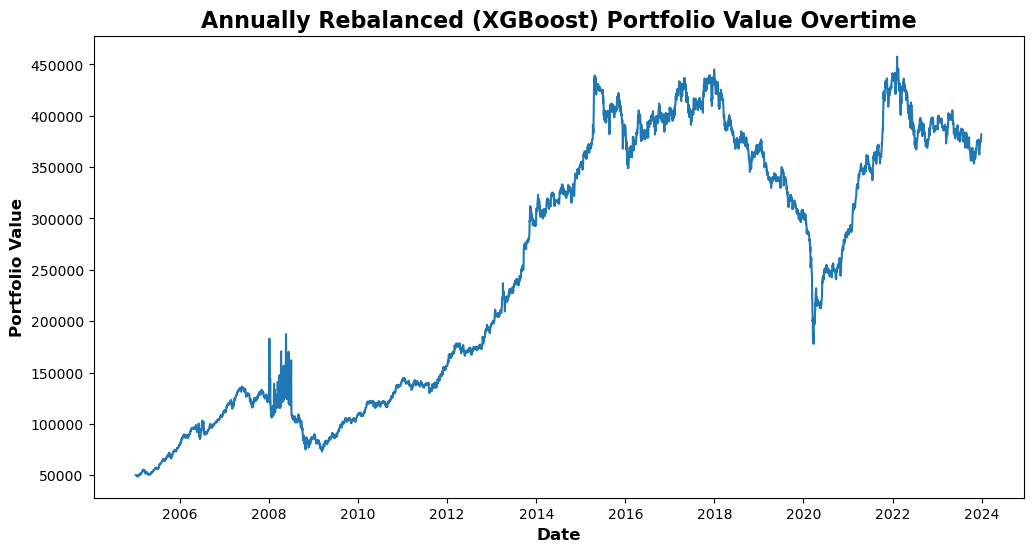

Portfolio Value at the beginning of 2024: R377533.95


In [78]:
plot_portfolio_value(annual_daily_port_value_xgb, 'Annually Rebalanced (XGBoost)')
print(f'Portfolio Value at the beginning of 2024: R{annual_port_history_xgb[2024]['Portfolio_Value']}')

This model seems to have more volatility with a lot of price movement around the years of 2008 and 2009. The growth still seems not quite as good as the previous algorithm, with a portfolio value of R377,533.95 or 655.1% increase in value over 19 years. Let's try an algorithm that rebalances bi-annually.

---

#### **Bi-Annually Rebalanced ETF Algorithm**

This algorithm rebalances bi-annually (every 6 months) and uses a lookback period of 6 to 12 months to select the top 40 performing stocks. The stocks are bought on the first trading day of January of 2005 for the first time with the initial R50000 capital. This portfolio is then rebalanced on the first day of July and the first trading day of January the following year, every year thereafter. The lookback period is 6 months for stocks with data more than 6 months but less than 12 months, and 12 months for stocks with more than 12 months of data. The code for this is below.

---

In [82]:
# Algorithm that rebalances biannually
def biannual_rebalance_algo(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['HalfYear'] = df['Month'].apply(lambda x: 1 if x <= 6 else 2)
    
    # Calculate Semi-Annual Returns (for each stock, each half-year period)
    semi_annual_returns = df.groupby(['Ticker', 'Year', 'HalfYear'])['Close'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    ).reset_index(name='Return').sort_values(['Year', 'HalfYear', 'Return'], ascending=[True, True, False])
    
    # Initialize ETF
    initial_capital = 50_000
    portfolio = {} 
    portfolio_history = {} 
    portfolio_daily_value = pd.DataFrame(columns=['Date', 'Portfolio_Value']) 
    
    # Get all unique dates in the dataset
    unique_dates = df['Date'].sort_values().unique()
    
    # Find the first available year with data
    first_year = 2004
    last_year = 2024  # Target end year
    
    for date in unique_dates:
        current_year = date.year
        current_month = date.month
        current_half = 1 if current_month <= 6 else 2
        
        # Skip years before 2001 (if any exist in data)
        if current_year < 2005:
            continue
        
        # Determine if this is a rebalance date (first trading day of each half-year)
        is_first_day_of_half = False
        if current_month == 1 or current_month == 7:
            # Check if this is the first trading day of the month
            earlier_dates = df[(df['Year'] == current_year) & 
                              (df['Month'] == current_month)]['Date']
            if len(earlier_dates) > 0 and date == earlier_dates.min():
                is_first_day_of_half = True
        
        if is_first_day_of_half:
            # Get top 40 stocks from previous half-year's performance
            if current_year == first_year and current_half == 1:
                # For the first half-year, use current half-year's data (no prior data)
                top_stocks = semi_annual_returns[
                    (semi_annual_returns['Year'] == current_year) & 
                    (semi_annual_returns['HalfYear'] == current_half)
                ].head(40)['Ticker'].tolist()
            else:
                # Determine previous period
                prev_year = current_year
                prev_half = current_half - 1
                if prev_half == 0:
                    prev_year -= 1
                    prev_half = 2
                
                top_stocks = semi_annual_returns[
                    (semi_annual_returns['Year'] == prev_year) & 
                    (semi_annual_returns['HalfYear'] == prev_half)
                ].head(40)['Ticker'].tolist()
            
            # Rebalance portfolio
            if portfolio:
                # Sell stocks not in the new top 40
                sold_value = 0
                stocks_to_remove = [s for s in portfolio if s not in top_stocks]
                
                for stock in stocks_to_remove:
                    # Use last available price before rebalance date
                    last_price = df[(df['Ticker'] == stock) & (df['Date'] < date)]['Close'].iloc[-1]
                    sold_value += portfolio[stock] * last_price
                    del portfolio[stock]
                
                # Buy new stocks (equal allocation of sale proceeds)
                new_stocks = [s for s in top_stocks if s not in portfolio]
                capital_per_stock = sold_value / len(new_stocks) if new_stocks else 0
                
                for stock in new_stocks:
                    # Use first available price on rebalance date
                    first_price = df[(df['Ticker'] == stock) & (df['Date'] == date)]['Close'].iloc[0]
                    shares = capital_per_stock / first_price
                    portfolio[stock] = shares
            else:
                # Initial investment (first period)
                capital_per_stock = initial_capital / 40
                for stock in top_stocks:
                    first_price = df[(df['Ticker'] == stock) & (df['Date'] == date)]['Close'].iloc[0]
                    shares = capital_per_stock / first_price
                    portfolio[stock] = shares
            
            # Record portfolio composition after rebalancing
            current_prices = df[df['Date'] == date].set_index('Ticker')['Close']
            current_value = sum(shares * current_prices.get(stock, 0) for stock, shares in portfolio.items())
            
            halfyear_data = []
            for stock, shares in portfolio.items():
                price = current_prices.get(stock, 0)
                stock_value = shares * price
                halfyear_data.append({
                    'Ticker': stock,
                    'Shares': round(shares, 2),
                    'Share Price': round(price, 2),
                    'Value Contribution': round(stock_value, 2),
                    '% of Portfolio': round((stock_value / current_value) * 100, 2) if current_value > 0 else 0
                })
            
            period_key = f"{current_year}H{current_half}"
            portfolio_history[period_key] = {
                'Portfolio_Value': round(current_value, 2),
                'Stocks': pd.DataFrame(halfyear_data)
            }
        
        # Calculate daily portfolio value
        daily_prices = df[df['Date'] == date].set_index('Ticker')['Close']
        daily_value = sum(shares * daily_prices.get(stock, 0) for stock, shares in portfolio.items())
        
        # Append to daily values
        portfolio_daily_value = pd.concat([
            portfolio_daily_value,
            pd.DataFrame({'Date': [date], 'Portfolio_Value': [daily_value]})
        ], ignore_index=True)
    
        # Stop if we've reached 2024
        if current_year >= last_year:
            break
    
    # Sort daily values
    portfolio_daily_value = portfolio_daily_value.sort_values('Date').reset_index(drop=True)

    return portfolio_daily_value, portfolio_history

In [83]:
biannual_daily_port_value, biannual_port_history = biannual_rebalance_algo(df)

C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\122087456.py:120: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolio_daily_value = pd.concat([


C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\4005892966.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df['Date'].isin(['2007-06-25'])]


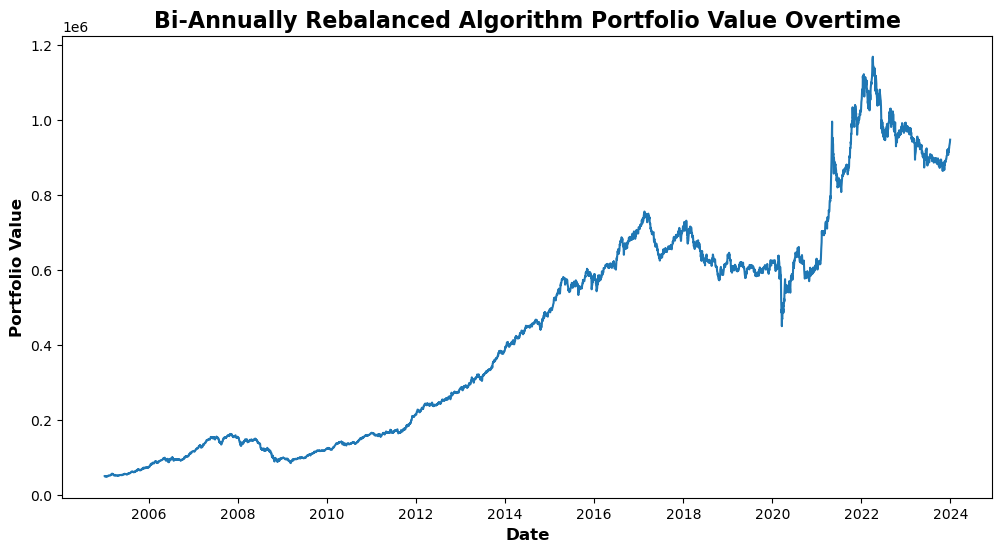

Portfolio Value at the beginning of 2024: R947425.69


In [84]:
plot_portfolio_value(biannual_daily_port_value, 'Bi-Annually Rebalanced Algorithm')
print(f'Portfolio Value at the beginning of 2024: R{biannual_port_history['2024H1']['Portfolio_Value']}')

The portfolio values has a very smooth growth with low volatility before the year 2016. Even during the stock market crash around 2008 to 2009 the portfolio seems to lose value graceful with decently low volatility. It becomes more volatile from the year 2020 with a large drop in value over a short period around the same time COVID-19 lockdown happened but recovers well thereafter. The portfolio value at the beginning of 2024 is R947,425.69, giving a growth of 1,794.6% in 19 years. Let's see if this algorithm can be improved with a model.

---

#### **Bi-Annually Rebalanced ETF With XGBoost Model**

This algorithm uses a XGBoost model to select the stocks for the ETF portfolio. Rebalancing occurs bi-annually and the lookback period is 6 months for stocks with more than 6 months of data available but less than 12 months, and 12 months for stocks with more than 12 months of data available in the dataset. Since this model did not perform that well in the annually rebalanced algorithm, hopefully it will perform better in the bi-annually rebalanced algorithm.

---

In [88]:
# Using a model to rebalance biannually
def biannual_rebalance_xgb(df):
    xgb_model = XGBRegressor(
        n_estimators=150,
        learning_rate=0.08,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'
    )
    scaler = StandardScaler()
    
    df = df.copy().sort_values(['Ticker', 'Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['HalfYear'] = df['Month'].apply(lambda x: 1 if x <= 6 else 2)
    
    initial_capital = 50000
    portfolio = {}
    portfolio_history = {}
    portfolio_daily_values = []
    
    unique_dates = df['Date'].sort_values().unique()
    price_lookup = df.set_index(['Date', 'Ticker'])['Close'].to_dict()
    
    for date in unique_dates:
        current_year = date.year
        if current_year < 2005:
            continue
        
        is_rebalance_day = date.month == 1 and date == df[(df['Year'] == date.year) & (df['Month'] == date.month)]['Date'].min()
        
        if is_rebalance_day:
            print(f'Rebalancing for {date.year}')
            top_stocks = []
            
            try:
                lookback_start = date - pd.DateOffset(months=12)
                X_train, y_train = [], []
                valid_tickers = []
                
                for ticker, group in df[(df['Date'] >= lookback_start) & (df['Date'] < date)].groupby('Ticker'):
                    closes = group['Close'].values
                    if len(closes) < 252:  # Require 12 months of data
                        continue
                    
                    features = [
                        (closes[-1] - closes[-126]) / closes[-126],  # 6m momentum
                        (closes[-1] - closes[-252]) / closes[-252],  # 12m momentum
                        np.std(closes[-252:]) / np.mean(closes[-252:]),  # Annual volatility
                        np.mean(group['Volume'].iloc[-126:]) if 'Volume' in group else 0,
                        (closes[-1] - np.min(closes[-126:])) / np.min(closes[-126:]),
                        len([x for x in (closes[-126:] > closes[-126])]) / 126]
                        
                    
                    future_data = df[(df['Ticker'] == ticker) & (df['Date'] > date - pd.DateOffset(months=12)) & (df['Date'] <= date)]
                    if len(future_data) > 0:
                        future_return = (future_data['Close'].iloc[-1] - closes[-1]) / closes[-1]
                        X_train.append(features)
                        y_train.append(future_return)
                        valid_tickers.append(ticker)
                
                if len(X_train) > 50:
                    X_train = scaler.fit_transform(X_train)
                    xgb_model.fit(X_train, y_train)
                    
                    X_pred = X_train
                    
                    if len(X_pred) > 0:
                        #X_pred = scaler.transform(X_pred)
                        pred_returns = xgb_model.predict(X_pred)
                        top_stocks = [valid_tickers[i] for i in np.argsort(pred_returns)[-40:]]
            except Exception as e:
                print(f"XGBoost failed on {date.date()}: {str(e)}")

            if current_year > 2023:
                top_stocks = []
                
            
            if len(top_stocks) == 0:
                current_data = df[df['Date'] == date].copy()
                current_data['Momentum'] = current_data.groupby('Ticker')['Close'].transform(
                    lambda x: (x.iloc[-1] - x.iloc[-126]) / x.iloc[-126] if len(x) >= 126 else 0
                )
                top_stocks = current_data.nlargest(40, 'Momentum')['Ticker'].tolist()
            
            current_prices = df[df['Date'] == date].set_index('Ticker')['Close']
            
            sold_value = sum(portfolio.get(stock, 0) * current_prices.get(stock, 0) for stock in portfolio if stock not in top_stocks)
            portfolio = {stock: shares for stock, shares in portfolio.items() if stock in top_stocks}
            
            new_stocks = [s for s in top_stocks if s not in portfolio]
            capital_per_stock = (sold_value + (initial_capital if not portfolio else 0)) / max(1, len(new_stocks))
            
            for stock in new_stocks:
                if stock in current_prices:
                    shares = capital_per_stock / current_prices[stock]
                    portfolio[stock] = shares
            
            current_value = sum(shares * current_prices.get(stock, 0) for stock, shares in portfolio.items())
            portfolio_history[f"{date.year}"] = {
                'Portfolio_Value': current_value,
                'Stocks': list(portfolio.keys()),
                'Method': 'XGB' if len(top_stocks) > 0 else 'Momentum'
            }
        
        daily_value = sum(shares * price_lookup.get((date, stock), 0) for stock, shares in portfolio.items())
        portfolio_daily_values.append({'Date': date, 'Portfolio_Value': daily_value})
    
    portfolio_daily_value = pd.DataFrame(portfolio_daily_values).sort_values('Date')
    return portfolio_daily_value, portfolio_history

In [89]:
biannual_daily_port_value_xgb, biannual_port_history_xgb = biannual_rebalance_xgb(df)

Rebalancing for 2005
Rebalancing for 2006
Rebalancing for 2007
Rebalancing for 2008
Rebalancing for 2009
Rebalancing for 2010
Rebalancing for 2011
Rebalancing for 2012
Rebalancing for 2013
Rebalancing for 2014
Rebalancing for 2015
Rebalancing for 2016
Rebalancing for 2017
Rebalancing for 2018
Rebalancing for 2019
Rebalancing for 2020
Rebalancing for 2021
Rebalancing for 2022
Rebalancing for 2023
Rebalancing for 2024


C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\4005892966.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df['Date'].isin(['2007-06-25'])]


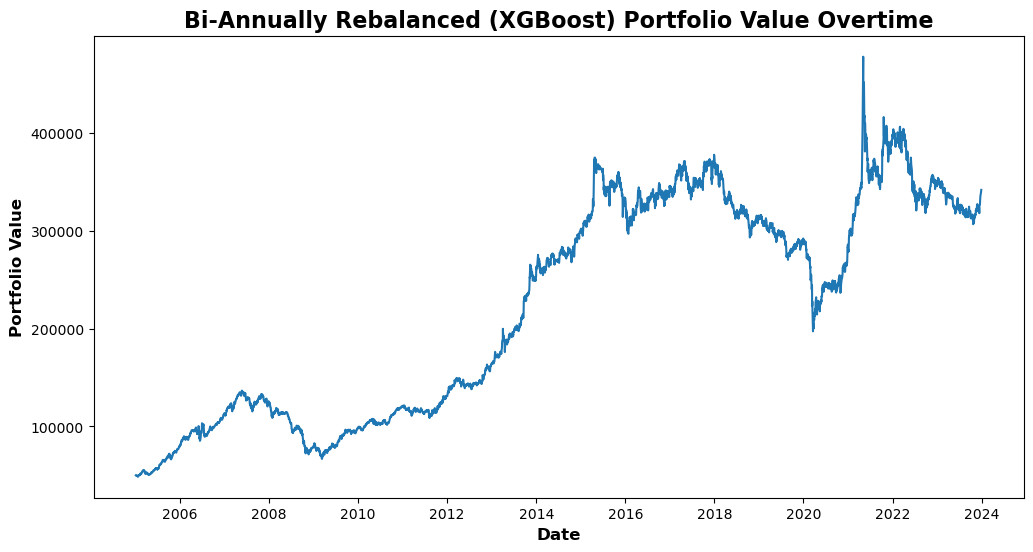

Portfolio Value at the beginning of 2024: R341388.22928350104


In [90]:
plot_portfolio_value(biannual_daily_port_value_xgb, 'Bi-Annually Rebalanced (XGBoost)')
print(f'Portfolio Value at the beginning of 2024: R{biannual_port_history_xgb['2024']['Portfolio_Value']}')

The portfolio value when using the XGBoost model on the bi-annually rebalanced algorithm performs worse, with a value of R341,388,23 or 582.8% growth in 19 years. This makes it the worst performing algorithm thus far. It seems the use of a model for stock selection makes the algorithms perform worse than when they do not have a model. The value overtime has some high volatility after the year 2020, which has been a common thing among the algorithms built so far. For the purpose of confirming if a model makes the ETF to perform worse, let's try a different model instead of the XGBoost.

---

#### **Annually-Rebalanced ETF With Long Short-Term Memory (LSTM) Model**

An LSTM is a sequential model made to deal with time-series data, which the stock data is. This model generally requires a large amount of data which does not make it perfectly suitable for the way this ETF is managed. Rebalancing every 6 to 12 months and training on 12 to 24 months of data might not be enough data for this model to fully capture trends. In this section the model will be trained on 12 months of data to predict stocks for the next 12 months and training will occur every 12 months at the time of rebalancing. The code is below.

---

In [91]:
# Annual rebalance with LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def annual_rebalance_lstm(df):
    # LSTM model configuration
    def create_lstm_model(input_shape):
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=input_shape),
            Dropout(0.3),
            LSTM(32),
            Dropout(0.3),
            Dense(1)
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='mse',
                      metrics=['mae'])
        return model
    
    scaler = StandardScaler()
    
    annual_returns = df.groupby(['Ticker', 'Year'])['Close'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    ).reset_index(name='Return').sort_values(['Year', 'Return'], ascending=[True, False])
    
    initial_capital = 50_000
    portfolio = {}
    portfolio_history = {}
    portfolio_daily_values = []
    
    unique_dates = df['Date'].sort_values().unique()
    price_lookup = df.set_index(['Date', 'Ticker'])['Close'].to_dict()

    for date in unique_dates:
        current_year = date.year
        
        if current_year < 2005:  # Start from 2001
            continue
        
        # Rebalance at the beginning of each year
        if date == df[df['Year'] == current_year]['Date'].min():
            print(f'\nRebalancing for year: {current_year}')
            
            top_stocks = []
            try:
                # We need 24 months of data: 12 for input + 12 for target
                lookback_start = date - pd.DateOffset(months=24)
                
                X_train, y_train, valid_tickers = [], [], []
                
                for ticker, group in df[(df['Date'] >= lookback_start) & (df['Date'] < date)].groupby('Ticker'):
                    closes = group['Close'].values
                    
                    # Need at least 252*2 trading days (2 years) of data
                    if len(closes) < 504:
                        continue
                    
                    # Create sequences - using monthly data (21 trading days = ~1 month)
                    sequence_length = 12  # 12 months of input
                    step_size = 21  # Approximately 1 month in trading days
                    
                    sequences = []
                    targets = []
                    
                    # Create rolling 12-month to 12-month sequences
                    for i in range(len(closes) - sequence_length*step_size - 252):
                        # Input: 12 months of monthly returns
                        monthly_returns = []
                        for j in range(sequence_length):
                            start_idx = i + j*step_size
                            end_idx = start_idx + step_size
                            if end_idx >= len(closes):
                                break
                            monthly_return = (closes[end_idx] - closes[start_idx]) / closes[start_idx]
                            monthly_returns.append(monthly_return)
                        
                        if len(monthly_returns) < sequence_length:
                            continue
                            
                        # Target: Next 12-month return
                        target = (closes[i+sequence_length*step_size+252] - closes[i+sequence_length*step_size]) / closes[i+sequence_length*step_size]
                        
                        sequences.append(monthly_returns)
                        targets.append(target)
                        valid_tickers.append(ticker)
                    
                    if sequences:
                        X_train.extend(sequences)
                        y_train.extend(targets)
                
                if len(X_train) > 100:
                    X_train = np.array(X_train)
                    y_train = np.array(y_train)
                    
                    # Reshape for LSTM [samples, timesteps, features]
                    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
                    
                    # Create and train LSTM model
                    lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
                    
                    # Add early stopping
                    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                    
                    # Train with validation split
                    lstm_model.fit(
                        X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=0
                    )
                    
                    print(f"Training samples: {len(X_train)}")
                    
                    # Prepare current data for prediction (most recent 12 months)
                    X_pred = []
                    current_tickers = []
                    
                    for ticker in df['Ticker'].unique():
                        # Get the last 12 months of data for this ticker
                        ticker_data = df[(df['Ticker'] == ticker) & 
                                       (df['Date'] >= date - pd.DateOffset(months=12)) & 
                                       (df['Date'] <= date)]
                        
                        if len(ticker_data) < 12:
                            continue
                            
                        # Calculate monthly returns for the last 12 months
                        monthly_returns = []
                        for i in range(11):
                            start_price = ticker_data.iloc[i]['Close']
                            end_price = ticker_data.iloc[i+1]['Close']
                            monthly_return = (end_price - start_price) / start_price
                            monthly_returns.append(monthly_return)
                        
                        # Add the most recent month (current to previous month)
                        if len(ticker_data) >= 2:
                            start_price = ticker_data.iloc[-2]['Close']
                            end_price = ticker_data.iloc[-1]['Close']
                            monthly_return = (end_price - start_price) / start_price
                            monthly_returns.append(monthly_return)
                        
                        if len(monthly_returns) == 12:
                            X_pred.append(monthly_returns)
                            current_tickers.append(ticker)
                    
                    if X_pred:
                        X_pred = np.array(X_pred)
                        X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1], 1)
                        
                        print(f"Stocks available for prediction: {len(X_pred)}")
                        pred_returns = lstm_model.predict(X_pred).flatten()
                        
                        # Select top 40 stocks with highest predicted returns
                        top_stocks = [current_tickers[i] for i in np.argsort(pred_returns)[-40:]]
                        print(f"Selected {len(top_stocks)} stocks for portfolio")
            
            except Exception as e:
                print(f"LSTM failed on {date.date()}: {str(e)}")
                import traceback
                traceback.print_exc()
            
            # Fallback to previous year's top performers if LSTM selection fails
            if len(top_stocks) == 0:
                top_stocks = annual_returns[annual_returns['Year'] == current_year - 1].head(40)['Ticker'].tolist()
                print(f"Using fallback selection with {len(top_stocks)} stocks")
            
            # Get current prices for rebalancing
            current_prices = {ticker: price for (d, ticker), price in price_lookup.items() if d == date}
            
            # Sell stocks not in the new portfolio
            sold_value = sum(portfolio.get(stock, 0) * current_prices.get(stock, 0) 
                            for stock in portfolio if stock not in top_stocks)
            portfolio = {stock: shares for stock, shares in portfolio.items() if stock in top_stocks}
            
            # Calculate capital for new stocks
            new_stocks = [s for s in top_stocks if s not in portfolio]
            capital_per_stock = (sold_value + (initial_capital if not portfolio else 0)) / len(new_stocks) if new_stocks else 0
            
            # Buy new stocks
            for stock in new_stocks:
                if stock in current_prices and capital_per_stock > 0:
                    shares = capital_per_stock / current_prices[stock]
                    portfolio[stock] = shares
            
            # Calculate current portfolio value
            current_value = sum(shares * current_prices.get(stock, 0) for stock, shares in portfolio.items())
            
            # Prepare portfolio composition report
            yearly_data = []
            for stock, shares in portfolio.items():
                price = current_prices.get(stock, 0)
                stock_value = shares * price
                yearly_data.append({
                    'Ticker': stock,
                    'Shares': round(shares, 6),
                    'Share Price': round(price, 2),
                    'Value Contribution': round(stock_value, 2),
                    '% of Portfolio': round((stock_value / current_value) * 100, 2)
                })
            
            # Store portfolio information for this year
            portfolio_history[current_year] = {
                'Portfolio_Value': round(current_value, 2),
                'Stocks': pd.DataFrame(yearly_data)
            }
        
        # Track daily portfolio value
        daily_value = sum(shares * price_lookup.get((date, stock), 0) for stock, shares in portfolio.items())
        portfolio_daily_values.append({'Date': date, 'Portfolio_Value': daily_value})
    
    portfolio_daily_value = pd.DataFrame(portfolio_daily_values).sort_values('Date')
    return portfolio_daily_value, portfolio_history

In [92]:
annual_daily_port_value_lstm, annual_port_history_lstm = annual_rebalance_lstm(df)


Rebalancing for year: 2005


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 1785
Stocks available for prediction: 110
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2006


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 1853
Stocks available for prediction: 111
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2007


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 1540
Stocks available for prediction: 117
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D8A0F8F560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2008


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 448
Stocks available for prediction: 127
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2009
Using fallback selection with 40 stocks

Rebalancing for year: 2010
Using fallback selection with 40 stocks

Rebalancing for year: 2011


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 910
Stocks available for prediction: 137
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2012


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2191
Stocks available for prediction: 138
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2013


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2328
Stocks available for prediction: 139
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2014


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2484
Stocks available for prediction: 141
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2015


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2520
Stocks available for prediction: 151
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2016


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2538
Stocks available for prediction: 159
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2017


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 2567
Stocks available for prediction: 165
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2018


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 1926
Stocks available for prediction: 172
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2019


C:\Users\bhemb\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training samples: 330
Stocks available for prediction: 177
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Selected 40 stocks for portfolio

Rebalancing for year: 2020
Using fallback selection with 40 stocks

Rebalancing for year: 2021
Using fallback selection with 40 stocks

Rebalancing for year: 2022
Using fallback selection with 40 stocks

Rebalancing for year: 2023
Using fallback selection with 40 stocks

Rebalancing for year: 2024
Using fallback selection with 40 stocks


C:\Users\bhemb\AppData\Local\Temp\ipykernel_13564\4005892966.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[~df['Date'].isin(['2007-06-25'])]


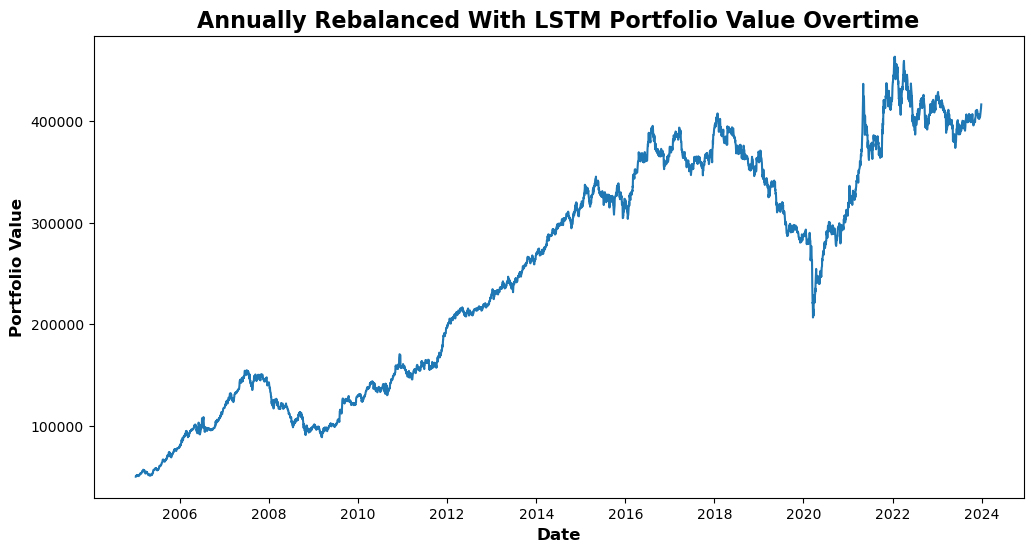

Portfolio Value at the beginning of 2024: R412520.08


In [93]:
plot_portfolio_value(annual_daily_port_value_lstm, 'Annually Rebalanced With LSTM')
print(f'Portfolio Value at the beginning of 2024: R{annual_port_history_lstm[2024]['Portfolio_Value']}')

This LSTM-based algorithm performed better than the other model-based algorithms but not well enough to outperform the algorithms without any models. The value for this model is R412,520.08 or 725.04% growth in 19 years. It is safe assume that models do not improve stock selection for the ETF possible due to how short the rebalance period is (6 to 12 months). Maybe the models may perform better if they were to be trained on data of more than 5 years. Let's move on to evaluation to select the best algorithm for the ETF.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

Now that we our algorithms and models, we can start looking at some key performance indicators (KPIs) to select the best model. The total return of the model is not the main criteria for selecting the best ETF model. KPIs such as rolling volatility, rolling drawdown, maximum drawdown, sharpe ratio, precision and MAE also play a cruicial role in selecting the best algorithm or model for the ETF. Some information about the KPIs:
* **Rolling Volatility** - Measures how much the portfolio value fluctuates over time (the rolling window is 12 months). This figure is in percentage form and lower is better.

* **Rolling drawdown** - A drawdown is the percentage drop from a peak in portfolio value to a subsequent trough. A rolling drawdown tracks this behavior within a moving window (12 months in this case). The maximum drawdown is also found in this KPI.

* **Sharpe ratio** - Measures how much access return the protfolio earns per a unit of risk. A value above 1 is acceptable, with a value above 2 highly desirable. This metric is chosen because it is widely used in the finance industry as a measure of risk-to-reward for a given portfolio or asset.

*  **Precision** - Measures the proportion of stocks selected by each model or algorithm for the portfolio that actually appeared among the top 40 performing stocks for the given period.

*  **Mean Absolute Error (MAE)** - Measures the average absolute difference between the actual top 40 stocks and the predicted top 40 stocks. MAE is chosen because it is simple to interpret, it cares about whether or not predicted stocks are appear in the top 40 and does not take into account the rank of those stocks.

These are the KPIs, including the total return, that will be used to select the best performing algorithm or model for the ETF. Starting with rolling volatility, let's get the code and compare the models.

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [95]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [97]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [99]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [101]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
